In [1]:
import sys 
sys.path.append("/cellar/users/mpagadal/Programs/anaconda3/lib/python3.7/site-packages")
sys.path.insert(1, '/cellar/users/mpagadal/Data/scripts')
import json

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import networkx as nx
from ndex2.nice_cx_network import NiceCXNetwork 
import ndex2.client as nc
import ndex2

In [4]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [5]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## Get pearson correlations

In [6]:
brian=pd.read_csv("../immune-phenotype-pearson/brian.tpm.immune.phenotypes.pearson.csv")
firebrowse=pd.read_csv("../immune-phenotype-pearson/firebrowse.immune.phenotypes.pearson.csv")
pancan=pd.read_csv("../immune-phenotype-pearson/pancan.immune.phenotypes.pearson.csv")


In [7]:
genes=pd.read_csv("/cellar/users/mpagadal/Data/gcta/notebooks/immune.genes.2.rna.txt")["genes"].tolist()

In [8]:
df=pd.DataFrame({"phenotypes":genes})

In [9]:
#map to categories
with open('pheno_dictionary.json', 'r') as f:
    pheno_dict = json.load(f)
df["category"]=df["phenotypes"].map(pheno_dict)

In [10]:
df["category"].unique()

array(['immunomodulators', 'antigen present', 'IFNG', 'immune checkpoint',
       'cell type', 'TGFbeta', 'immune infiltration',
       'landscape components'], dtype=object)

In [11]:
mp={"immunomodulators":"Thorsson et al.","antigen present":"Gene Ontology","IFNG":"Biocarta","immune checkpoint":"Thorsson et al","cell type":"Danaher et al","TGFbeta":"Biocarta","immune infiltration":"CIBERSORTx","landscape components":"Thorsson et al"}

In [12]:
df["source"]=df["category"].map(mp)

In [13]:
df.to_csv("phenotype.table.csv",index=None)

In [14]:
mp_ids={"CMC2":"C16orf61",
    "ADGRE5":"CD97",
    "SPRYD7":"C13orf1",
    "JCHAIN":"IGJ",
    "CTSL":"CTSL1",
    "CTSV":"CTSL2",
     "TEX30":"C13orf27",
     "CENPU":"MLF1IP",
     "CMSS1":"C3orf26",
     "FAM216A":"C12orf24",
     "HACD2":"PTPLB", "MARCHF1":"MARCH1"}
mp_ids= {v: k for k, v in mp_ids.items()}

In [15]:
brian=brian.replace({"Unnamed: 0": mp_ids})
firebrowse=firebrowse.replace({"Unnamed: 0": mp_ids})
pancan=pancan.replace({"Unnamed: 0": mp_ids})

In [16]:
brian=brian.rename(columns=mp_ids)
firebrowse=firebrowse.rename(columns=mp_ids)
pancan=pancan.rename(columns=mp_ids)

In [17]:
df=brian.append(firebrowse)
df=df.append(pancan)

In [18]:
df=df[df["Unnamed: 0"].isin(genes)]

In [19]:
cols=["Unnamed: 0"]+genes

In [20]:
df=df[cols]

In [21]:
df=df.groupby(by=df["Unnamed: 0"]).mean()

In [22]:
with open('pheno_dictionary.json', 'r') as f:
    pheno_dict = json.load(f)

In [23]:
color_category={"#66c2a5":"antigen present","#fc8d62":"immunomodulators","#8da0cb":"immune checkpoint","#e78ac3":"cell type","#a6d854":"TGFbeta","#ffd92f":"IFNG","#e5c494":"immune infiltration","silver":"landscape components"}
category_color=dict((y,x) for x,y in color_category.items())

In [24]:
pheno_color=[category_color[pheno_dict[x.replace("-",".")]] for x in df.columns]

### get protein atlas 

In [25]:
atlas=pd.read_csv("proteinatlas.tsv",delimiter="\t")
atlas.head()

,Gene,Gene synonym,Ensembl,Gene description,Uniprot,Chromosome,Position,Protein class,Evidence,HPA evidence,...,Brain RNA - amygdala [NX],Brain RNA - basal ganglia [NX],Brain RNA - cerebellum [NX],Brain RNA - cerebral cortex [NX],Brain RNA - hippocampal formation [NX],Brain RNA - hypothalamus [NX],Brain RNA - midbrain [NX],Brain RNA - olfactory region [NX],Brain RNA - pons and medulla [NX],Brain RNA - thalamus [NX]
0,TSPAN6,"T245, TM4SF6, TSPAN-6",ENSG00000000003,Tetraspanin 6,O43657,X,100627109-100639991,"Predicted intracellular proteins, Predicted me...",Evidence at protein level,Evidence at transcript level,...,7.0,6.6,2.9,4.9,7.4,7.3,6.9,4.1,34.2,6.6
1,TNMD,"BRICD4, ChM1L, myodulin, TEM, tendin",ENSG00000000005,Tenomodulin,Q9H2S6,X,100584802-100599885,Predicted membrane proteins,Evidence at protein level,Evidence at transcript level,...,0.1,0.0,0.0,0.1,0.9,0.1,0.6,0.0,0.6,0.0
2,DPM1,"CDGIE, MPDS",ENSG00000000419,Dolichyl-phosphate mannosyltransferase subunit...,O60762,20,50934867-50958555,"Disease related genes, Enzymes, Plasma protein...",Evidence at protein level,Evidence at transcript level,...,20.2,30.0,22.5,35.1,22.2,21.5,21.6,17.2,31.4,21.7
3,SCYL3,"PACE-1, PACE1",ENSG00000000457,SCY1 like pseudokinase 3,Q8IZE3,1,169849631-169894267,"Enzymes, Predicted intracellular proteins",Evidence at protein level,Evidence at transcript level,...,8.5,10.6,10.5,11.9,7.3,6.5,9.3,7.8,9.5,8.9
4,C1orf112,FLJ10706,ENSG00000000460,Chromosome 1 open reading frame 112,Q9NSG2,1,169662007-169854080,Predicted intracellular proteins,Evidence at protein level,Evidence at transcript level,...,3.3,4.9,8.4,3.6,2.7,2.4,5.0,1.5,4.5,5.9


In [26]:
immune_specificity=atlas[atlas["RNA blood cell specificity"].isin(["Cell type enhanced","Cell type enriched","Group enriched "])]["Gene"].tolist()

In [27]:
cancer_specificity=atlas[atlas["RNA cancer specificity"].isin(["Cancer enhanced","Cancer enriched","Group enriched "])]["Gene"].tolist()

In [28]:
immune_color=["blue" if x in immune_specificity else "gray" for x in df.columns]
cancer_color=["red" if x in cancer_specificity else "gray" for x in df.columns]

In [29]:
len([x for x in immune_color if x != "gray"])

179

In [30]:
len([x for x in cancer_color if x != "gray"])

33

<Figure size 1080x720 with 0 Axes>

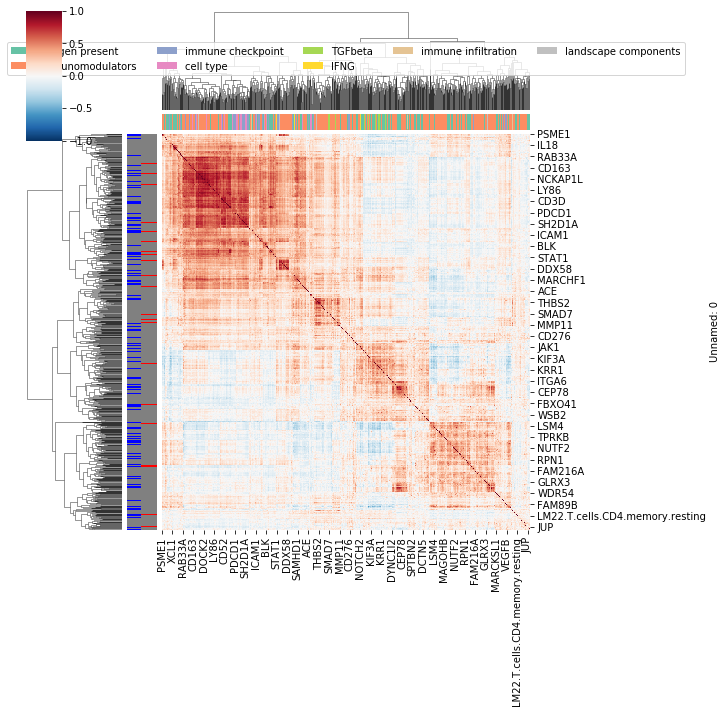

In [31]:
fig = plt.figure(figsize=(15,10))
g=sns.clustermap(df,vmin=-1,cmap="RdBu_r",col_colors = pheno_color,row_colors=[immune_color,cancer_color])
for label in category_color.keys():
    g.ax_col_dendrogram.bar(0, 0, color=category_color[label],
                            label=label, linewidth=0)
g.ax_col_dendrogram.legend(loc="center", ncol=5)
plt.savefig('/cellar/users/mpagadal/Data/projects/germline-immune/plots/pheno-clustermaps/compiled_pheno_clustermap.pdf',dpi=300)

## Make network

In [32]:
links=df.stack().reset_index()
links.columns=["node1","node2","value"]

In [33]:
links["color"]=np.where(links["value"]>0,"green","red")

In [34]:
edges=links[(links["value"]>0.8)|(links["value"]<-0.4)]
edges=edges[edges["node1"]!=edges["node2"]]

In [35]:
edge_color=[]

G=nx.Graph()

for i,row in edges.iterrows():
    if row["value"]>0:
        G.add_edge(row["node1"],row["node2"],width=abs(row["value"]),color="blue")
    else:
        G.add_edge(row["node1"],row["node2"],width=abs(row["value"]),color="red")

In [36]:
final = ndex2.create_nice_cx_from_networkx(G)
final.upload_to('http://public.ndexbio.org', username = 'meghanasp21', password = 'student16')

Generating CX


'http://public.ndexbio.org/v2/network/8514b379-10c5-11eb-9eee-0ac135e8bacf'

## Get PC analysis

In [37]:
scaler=StandardScaler()
scaler.fit(df)
X_scaled=scaler.transform(df)

In [38]:
pca = PCA(n_components=30)

In [39]:
pca.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=30, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [40]:
mp_variance={}

for i,val in enumerate(pca.explained_variance_ratio_.tolist()):
    key="PC"+str(i+1)
    mp_variance[key]=val

In [41]:
mp_variance

{'PC1': 0.4676610823917536,
 'PC2': 0.22290897306676405,
 'PC3': 0.09918258359771767,
 'PC4': 0.04928347263862137,
 'PC5': 0.032000792790679626,
 'PC6': 0.02270919895359173,
 'PC7': 0.014582560648017419,
 'PC8': 0.00869288829578212,
 'PC9': 0.0072943181023049294,
 'PC10': 0.005062732701556827,
 'PC11': 0.0048120294746345415,
 'PC12': 0.0042839477312424075,
 'PC13': 0.0037384837532519356,
 'PC14': 0.0029675557149545593,
 'PC15': 0.002771447622653495,
 'PC16': 0.0024086391541869494,
 'PC17': 0.0022321950893576187,
 'PC18': 0.001943781306523573,
 'PC19': 0.001875382605585731,
 'PC20': 0.001687010176170761,
 'PC21': 0.0016575058028674376,
 'PC22': 0.001550781290135971,
 'PC23': 0.0013832361020039152,
 'PC24': 0.0013091582323798306,
 'PC25': 0.0012467945374624128,
 'PC26': 0.0011979047525052372,
 'PC27': 0.0011347751691985631,
 'PC28': 0.001118932703056659,
 'PC29': 0.0010334510331497678,
 'PC30': 0.0009033285231474621}

In [42]:
X_pca=pca.transform(X_scaled)

In [43]:
df_pca=pd.DataFrame(X_pca)
df_pca.index=df.index

In [44]:
df_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
ACE,3.602474,-5.844746,12.803933,4.048394,1.945091,-3.783942,-4.394167,-0.024318,1.844465,-1.140857,...,1.445229,-0.024234,-1.514656,0.046928,-1.726923,2.851194,0.214694,0.119346,2.364266,0.205442
ACTL6A,-26.201502,-9.078942,-11.618289,-0.217963,2.092104,4.249108,0.881496,0.653909,-2.663273,3.505164,...,2.373878,2.888433,-0.115373,-0.598751,0.247541,-0.102007,-1.078046,-0.173806,0.218223,0.665139
ACTR10,-16.980338,-1.458452,-0.523980,3.608066,-12.288836,6.703180,0.725104,-2.651065,5.582576,-0.155135,...,3.260074,-1.995543,-1.668168,-1.194137,0.426488,-0.886951,-2.110191,0.281875,-0.166250,-0.279168
ACTR1A,-8.613008,9.637121,7.599132,-8.816348,-3.637972,-3.488652,-5.094225,-5.289150,2.935597,-5.153590,...,-1.304035,-0.899555,2.209058,0.512936,-1.490434,0.367983,1.162195,-1.285031,-0.201134,-0.305404
ACTR1B,-16.965629,5.505864,12.982189,4.416247,-0.271426,-3.743335,-5.573542,-6.568633,-2.032478,1.361268,...,1.348526,-0.953289,-2.967224,-1.513191,0.083358,-0.356291,-0.485618,-1.784627,1.409536,1.215099


## Get hubs 

In [45]:
atlas_cytoscape=atlas[["Gene","RNA blood cell specificity","RNA cancer specificity"]]

In [46]:
atlas_cytoscape["Gene"]=atlas_cytoscape["Gene"].str.replace("-",".")

/nrnb/opt/anaconda3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [47]:
atlas_cytoscape.to_csv("atlas.cytoscape.txt",index=None,sep="\t")

In [48]:
mac_genes=[x for x in G.neighbors("Macrophage.Regulation")]

In [49]:
lymph_genes=[x for x in G.neighbors("Lymphocyte.Infiltration.Signature.Score")]

In [50]:
gene=[]
cat=[]

for x in mac_genes:
    gene.append(x)
    cat.append("macrophage")
for x in lymph_genes:
    gene.append(x)
    cat.append("lymphocyte")


In [51]:
hub=pd.DataFrame({"gene":gene,"category":cat})

In [52]:
hub.to_csv("hub_genes.csv")

## Get pearson correlation for filtered dataset

In [53]:
genes=pd.read_csv("/cellar/users/mpagadal/Data/gcta/notebooks/gcta_significant_genes.txt",header=None)[0].tolist()

In [54]:
df_gcta=df[genes]
df_gcta=df_gcta.loc[genes]

In [55]:
immune_color=["blue" if x in immune_specificity else "gray" for x in df_gcta.columns]
cancer_color=["red" if x in cancer_specificity else "gray" for x in df_gcta.columns]

In [56]:
pheno_color=[category_color[pheno_dict[x.replace("-",".")]] for x in df_gcta.columns]

<Figure size 1080x720 with 0 Axes>

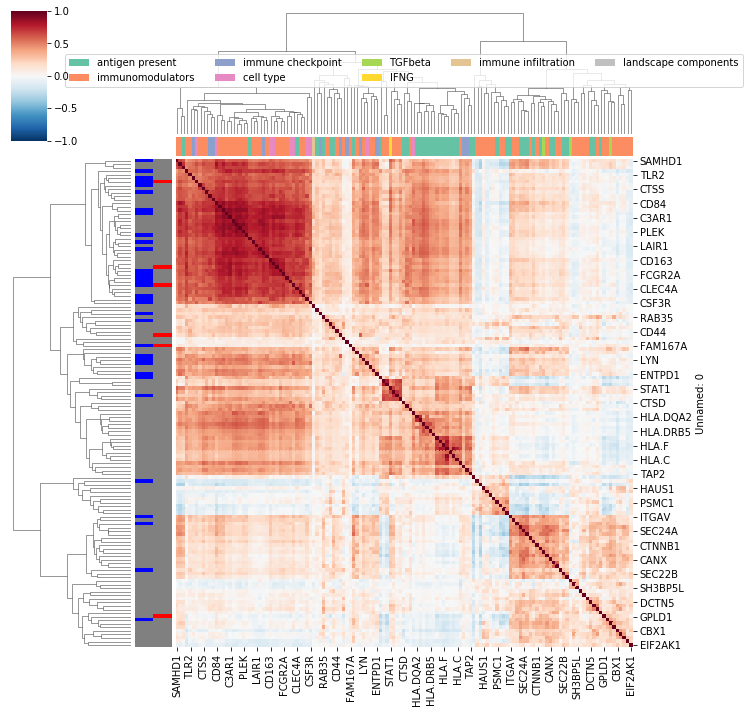

In [58]:
fig = plt.figure(figsize=(15,10))
g=sns.clustermap(df_gcta,vmin=-1,cmap="RdBu_r",col_colors = pheno_color,row_colors=[immune_color,cancer_color])
for label in category_color.keys():
    g.ax_col_dendrogram.bar(0, 0, color=category_color[label],
                            label=label, linewidth=0)
g.ax_col_dendrogram.legend(loc="center", ncol=5)
plt.savefig('/cellar/users/mpagadal/Data/projects/germline-immune/plots/pheno-clustermaps/compiled_pheno_gcta_clustermap.pdf',dpi=300)

In [44]:
links=df_gcta.stack().reset_index()
links.columns=["node1","node2","value"]

In [45]:
links["color"]=np.where(links["value"]>0,"green","red")

In [46]:
edges=links[(links["value"]>0.8)|(links["value"]<-0.8)]
edges=edges[edges["node1"]!=edges["node2"]]

In [47]:
edge_color=[]

G=nx.Graph()

for i,row in edges.iterrows():
    if row["value"]>0:
        G.add_edge(row["node1"],row["node2"],width=abs(row["value"]),color="blue")
    else:
        G.add_edge(row["node1"],row["node2"],width=abs(row["value"]),color="red")

In [48]:
final = ndex2.create_nice_cx_from_networkx(G)
final.upload_to('http://public.ndexbio.org', username = 'meghanasp21', password = 'student16')

Generating CX


'http://public.ndexbio.org/v2/network/3f76d38d-ecbc-11ea-99da-0ac135e8bacf'